In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

In [54]:
df = pd.read_excel('../Data/Merged_onehot.xlsx')

In [3]:
# df.sort_values('timestamp', inplace = True)

In [56]:
df.head()

,Unnamed: 0,PIN,Solution_points,case_assigned_to,timestamp,EDA
0,0,AEOGCR7,1,Goettlich,2018-05-08 15:12:22,1
1,1,AEOGCR7,1,Goettlich,2018-05-08 15:12:26,1
2,2,AEOGCR7,1,Goettlich,2018-05-08 15:12:52,1
3,3,AEOGCR7,1,Goettlich,2018-05-08 15:13:50,1
4,4,AEOGCR7,1,Goettlich,2018-05-08 15:14:05,1


In [57]:
df = df.drop('Unnamed: 0', 1)

In [58]:
df.head()

,PIN,Solution_points,case_assigned_to,timestamp,EDA
0,AEOGCR7,1,Goettlich,2018-05-08 15:12:22,1
1,AEOGCR7,1,Goettlich,2018-05-08 15:12:26,1
2,AEOGCR7,1,Goettlich,2018-05-08 15:12:52,1
3,AEOGCR7,1,Goettlich,2018-05-08 15:13:50,1
4,AEOGCR7,1,Goettlich,2018-05-08 15:14:05,1


In [59]:
names = df.case_assigned_to.unique().tolist()

In [60]:
vals = [1, 2, 3, 4, 5]
x = dict(zip(names, vals))

In [61]:
x

{'Goettlich': 1, 'Freundorf': 2, 'Binder': 3, 'Wenninger': 4, 'Schenker': 5}

In [62]:
df.replace(x, inplace = True)

In [63]:
df

,PIN,Solution_points,case_assigned_to,timestamp,EDA
0,AEOGCR7,1,1,2018-05-08 15:12:22,1
1,AEOGCR7,1,1,2018-05-08 15:12:26,1
2,AEOGCR7,1,1,2018-05-08 15:12:52,1
3,AEOGCR7,1,1,2018-05-08 15:13:50,1
4,AEOGCR7,1,1,2018-05-08 15:14:05,1
...,...,...,...,...,...
36489,LCBOMC3,1,5,2018-09-05 09:52:17,0
36490,LCBOMC3,1,5,2018-09-05 09:53:24,0
36491,LCBOMC3,1,5,2018-09-05 09:53:25,0
36492,LCBOMC3,1,5,2018-09-05 09:53:50,0


### Clustering based on the timeline

In [3]:
from sklearn.cluster import KMeans

In [65]:
# df2 = df.drop('PIN',1)

In [66]:
df

,PIN,Solution_points,case_assigned_to,timestamp,EDA
0,AEOGCR7,1,1,2018-05-08 15:12:22,1
1,AEOGCR7,1,1,2018-05-08 15:12:26,1
2,AEOGCR7,1,1,2018-05-08 15:12:52,1
3,AEOGCR7,1,1,2018-05-08 15:13:50,1
4,AEOGCR7,1,1,2018-05-08 15:14:05,1
...,...,...,...,...,...
36489,LCBOMC3,1,5,2018-09-05 09:52:17,0
36490,LCBOMC3,1,5,2018-09-05 09:53:24,0
36491,LCBOMC3,1,5,2018-09-05 09:53:25,0
36492,LCBOMC3,1,5,2018-09-05 09:53:50,0


### Engineering Timestamp

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36494 entries, 0 to 36493
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PIN               36494 non-null  object        
 1   Solution_points   36494 non-null  int64         
 2   case_assigned_to  36494 non-null  int64         
 3   timestamp         36494 non-null  datetime64[ns]
 4   EDA               36494 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.4+ MB


In [68]:
df['date'] = df['timestamp'].dt.date

In [69]:
df['day'] = df['timestamp'].dt.day

In [70]:
df['month'] = df['timestamp'].dt.month

In [71]:
df['year'] = df['timestamp'].dt.year

In [72]:
df['dayofweek'] = df['timestamp'].dt.dayofweek

In [73]:
df['week'] = df['timestamp'].dt.isocalendar().week

In [74]:
df['time'] = df['timestamp'].dt.time

In [75]:
df['hour'] = df['timestamp'].dt.hour

In [76]:
df['minute'] = df['timestamp'].dt.minute

In [77]:
df['seconds'] = df['timestamp'].dt.second

In [129]:
df['diff_timestamp'] = df.groupby(['PIN', 'case_assigned_to'])['timestamp'].transform(pd.Series.diff).fillna(pd.Timedelta(seconds=0))

In [133]:
df['diff_seconds']  = df['diff_timestamp'].apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')

In [141]:
df['diff_minutes'] = df["diff_timestamp"].apply(lambda x: x/np.timedelta64(1, 'm')).fillna(0).astype('int64')

In [78]:
# df['diff_timestamp'] = df['timestamp'].diff().fillna(pd.Timedelta(seconds=0))

In [79]:
# df['diff_minutes'] = df["timestamp"].diff().apply(lambda x: x/np.timedelta64(1, 'm')).fillna(0).astype('int64')

In [80]:
# df.diff_minutes.replace({-59: 0}, inplace = True)

In [81]:
# df['diff_seconds'] = df["timestamp"].diff().apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')

In [82]:
# df['diff_seconds'] = df["timestamp"].diff().apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')

In [83]:
df.head()

,PIN,Solution_points,case_assigned_to,timestamp,EDA,date,day,month,year,dayofweek,week,time,hour,minute,seconds,diff_timestamp,diff_minutes,diff_seconds
0,AEOGCR7,1,1,2018-05-08 15:12:22,1,2018-05-08,8,5,2018,1,19,15:12:22,15,12,22,0 days 00:00:00,0,0
1,AEOGCR7,1,1,2018-05-08 15:12:26,1,2018-05-08,8,5,2018,1,19,15:12:26,15,12,26,0 days 00:00:04,0,4
2,AEOGCR7,1,1,2018-05-08 15:12:52,1,2018-05-08,8,5,2018,1,19,15:12:52,15,12,52,0 days 00:00:26,0,26
3,AEOGCR7,1,1,2018-05-08 15:13:50,1,2018-05-08,8,5,2018,1,19,15:13:50,15,13,50,0 days 00:00:58,0,58
4,AEOGCR7,1,1,2018-05-08 15:14:05,1,2018-05-08,8,5,2018,1,19,15:14:05,15,14,5,0 days 00:00:15,0,15


In [84]:
# df.drop(['time_diff'],1, inplace = True)

In [146]:
df.groupby('month').size() # only 4 months data may to september

month
5    28515
6     1314
7     4386
8     1990
9      289
dtype: int64

In [147]:
df.groupby('year').size() # only 2018 data

year
2018    36494
dtype: int64

In [148]:
df.groupby('hour').size() # 6:00 to 20:00 hour data

hour
6      500
7     5112
8     5362
9      828
10    1120
11    5597
12    3687
13    1056
14    1011
15    6402
16    4664
17     690
18      67
19     329
20      69
dtype: int64

In [149]:
df.groupby('diff_minutes').size() # somevalues are too big, need to changes timediff based on PIN and case_assigned_to

diff_minutes
0        34944
1         1185
2          242
3           67
4           28
5           10
6            8
8            1
9            1
14           1
15           1
25           1
29           1
30           1
39           1
14224        1
14238        1
dtype: int64

In [150]:
df.groupby('dayofweek').size()  # only 6 observation on saturday and 314 on sunday

dayofweek
0    6501
1    8293
2    8711
3    8988
4    3681
5       6
6     314
dtype: int64

### Cleaning by timestamp

In [152]:
df.groupby('diff_seconds').size()

diff_seconds
0         4964
1         6236
2         4365
3         2755
4         2396
          ... 
1762         1
1841         1
2398         1
853468       1
854313       1
Length: 266, dtype: int64

In [164]:
df[df['diff_seconds'] == 853468]

,PIN,Solution_points,case_assigned_to,timestamp,EDA,date,day,month,year,dayofweek,week,time,hour,minute,seconds,diff_timestamp,diff_minutes,diff_seconds


In [159]:
df.drop(index = 36309, inplace = True)

In [167]:
df[df['diff_seconds'] == 854313]

,PIN,Solution_points,case_assigned_to,timestamp,EDA,date,day,month,year,dayofweek,week,time,hour,minute,seconds,diff_timestamp,diff_minutes,diff_seconds


In [166]:
df.drop(index = 33870, inplace = True)

In [170]:
df.groupby('diff_seconds').size()

diff_seconds
0       4964
1       6236
2       4365
3       2755
4       2396
        ... 
938        1
1527       1
1762       1
1841       1
2398       1
Length: 264, dtype: int64

In [219]:
df.groupby(['EDA','Solution_points']).sum()['diff_seconds']

EDA  Solution_points
0    0                   70070
     1                  131197
1    0                   42991
     1                   62874
2    0                    8803
     1                    7644
3    0                   18998
     1                   29073
4    0                   15688
     1                   22657
5    0                    6211
     1                    9104
Name: diff_seconds, dtype: int64

#### time spent on every EDA while scoring the correct/wrong results

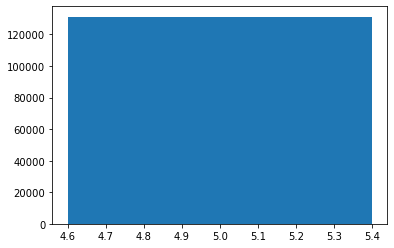

In [411]:
plt.bar(['EDA'])

<BarContainer object of 36492 artists>

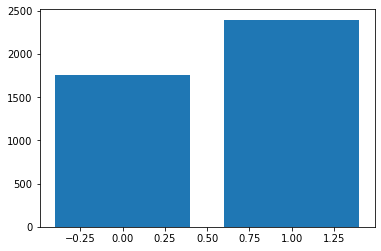

In [397]:
plt.bar(df['Solution_points'], df['diff_seconds'])

### Clustering based on timestamps

In [265]:
points = df.loc[:,('Solution_points','case_assigned_to','EDA','diff_seconds')].head()

In [377]:
# create kmeans object
kmeans = KMeans(n_clusters=5)

# fit kmeans object to data
kmeans.fit(df.loc[:36000,('Solution_points','case_assigned_to','EDA','diff_seconds')])

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)


[[5.87537092e-01 3.03237119e+00 1.24170488e+00 3.90180739e+01]
 [5.74029554e-01 3.30467673e+00 1.87479565e+00 4.36955476e+00]
 [5.00000000e-01 2.75000000e+00 0.00000000e+00 1.88200000e+03]
 [7.00000000e-01 2.76363636e+00 5.09090909e-01 2.64400000e+02]
 [6.87372709e-01 2.67311609e+00 6.38492872e-01 1.03387984e+02]]


In [378]:
# save new clusters for chart
y_km = kmeans.fit_predict(df.loc[:,('Solution_points','case_assigned_to','EDA','diff_seconds')])

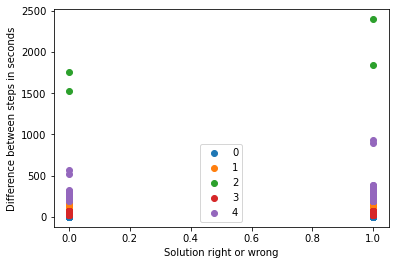

In [393]:
# plotting

for i in np.unique(y_km):
    plt.scatter(df.loc[y_km == i , 'Solution_points'] , df.loc[y_km == i , 'diff_seconds'] , label = i)


plt.ylabel("Difference between steps in seconds")
plt.xlabel("Solution right or wrong")
plt.legend()
plt.show()

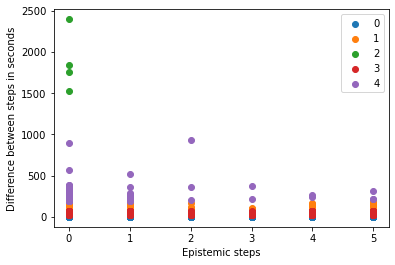

In [394]:
for i in np.unique(y_km):
    plt.scatter(df.loc[y_km == i , 'EDA'] , df.loc[y_km == i , 'diff_seconds'] , label = i)

plt.xlabel("Epistemic steps")
plt.ylabel("Difference between steps in seconds")
plt.legend()
plt.show()

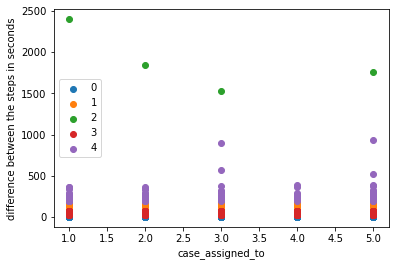

In [396]:

for i in np.unique(y_km):
    plt.scatter(df.loc[y_km == i , 'case_assigned_to'] , df.loc[y_km == i , 'diff_seconds'] , label = i)

plt.legend()
plt.xlabel("case_assigned_to")
plt.ylabel("difference between the steps in seconds")
plt.show()


In [412]:
df.head()

,PIN,Solution_points,case_assigned_to,timestamp,EDA,date,day,month,year,dayofweek,week,time,hour,minute,seconds,diff_timestamp,diff_minutes,diff_seconds
0,AEOGCR7,1,1,2018-05-08 15:12:22,1,2018-05-08,8,5,2018,1,19,15:12:22,15,12,22,0 days 00:00:00,0,0
1,AEOGCR7,1,1,2018-05-08 15:12:26,1,2018-05-08,8,5,2018,1,19,15:12:26,15,12,26,0 days 00:00:04,0,4
2,AEOGCR7,1,1,2018-05-08 15:12:52,1,2018-05-08,8,5,2018,1,19,15:12:52,15,12,52,0 days 00:00:26,0,26
3,AEOGCR7,1,1,2018-05-08 15:13:50,1,2018-05-08,8,5,2018,1,19,15:13:50,15,13,50,0 days 00:00:58,0,58
4,AEOGCR7,1,1,2018-05-08 15:14:05,1,2018-05-08,8,5,2018,1,19,15:14:05,15,14,5,0 days 00:00:15,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36489,LCBOMC3,1,5,2018-09-05 09:52:17,0,2018-09-05,5,9,2018,2,36,09:52:17,9,52,17,0 days 00:00:01,0,1
36490,LCBOMC3,1,5,2018-09-05 09:53:24,0,2018-09-05,5,9,2018,2,36,09:53:24,9,53,24,0 days 00:01:07,1,67
36491,LCBOMC3,1,5,2018-09-05 09:53:25,0,2018-09-05,5,9,2018,2,36,09:53:25,9,53,25,0 days 00:00:01,0,1
36492,LCBOMC3,1,5,2018-09-05 09:53:50,0,2018-09-05,5,9,2018,2,36,09:53:50,9,53,50,0 days 00:00:25,0,25


In [413]:
# determining the name of the file
file_name = 'timestamp_data.xlsx'
  
# saving the excel
df.to_excel(file_name)

In [4]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

In [ ]:
## check the data type for case_assigned_to while clustering
## try with the euclidean distance -- categorical data